In [1]:
import os

In [2]:
%pwd

'f:\\Files\\DS&ML\\Flight-Fare-Price-Prediction\\Exp'

In [3]:
os.chdir('../')
%pwd

'f:\\Files\\DS&ML\\Flight-Fare-Price-Prediction'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(os.path.join('artifacts', 'data_ingestion', 'flight-fare-data.csv'))
df.head()

Airline Source                           Source Name  \
0  Malaysian Airlines    CXB                   Cox's Bazar Airport   
1      Cathay Pacific    BZL                       Barisal Airport   
2     British Airways    ZYL  Osmani International Airport, Sylhet   
3  Singapore Airlines    RJH        Shah Makhdum Airport, Rajshahi   
4     British Airways    SPD                       Saidpur Airport   

  Destination                                   Destination Name  \
0         CCU  Netaji Subhas Chandra Bose International Airpo...   
1         CGP      Shah Amanat International Airport, Chittagong   
2         KUL                 Kuala Lumpur International Airport   
3         DAC      Hazrat Shahjalal International Airport, Dhaka   
4         YYZ              Toronto Pearson International Airport   

  Departure Date & Time  Arrival Date & Time  Duration (hrs) Stopovers  \
0   2025-11-17 06:25:00  2025-11-17 07:38:10        1.219526    Direct   
1   2025-03-16 00:17:00  2025-03-16 00:53:31        0.608638    Direct   
2   2025-12-13 12:03:00  2025-12-13 14:44:22        2.689651    1 Stop   
3   2025-05-30 03:21:00  2025-05-30 04:02:09        0.686054    Direct   
4   2025-04-25 09:14:00  2025-04-25 23:17:20       14.055609    1 Stop   

  Aircraft Type        Class  Booking Source  Base Fare (BDT)  \
0   Airbus A320      Economy  Online Website     21131.225021   
1   Airbus A320  First Class   Travel Agency     11605.395471   
2    Boeing 787      Economy   Travel Agency     39882.499349   
3   Airbus A320      Economy  Direct Booking      4435.607340   
4   Airbus A350     Business  Direct Booking     59243.806146   

   Tax & Surcharge (BDT)  Total Fare (BDT)      Seasonality  \
0            5169.683753      26300.908775          Regular   
1             200.000000      11805.395471          Regular   
2           11982.374902      51864.874251  Winter Holidays   
3             200.000000       4635.607340          Regular   
4           14886.570922      74130.377068          Regular   

   Days Before Departure  
0                     10  
1                     14  
2                     83  
3                     56  
4                     90

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57000 entries, 0 to 56999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Airline                57000 non-null  object 
 1   Source                 57000 non-null  object 
 2   Source Name            57000 non-null  object 
 3   Destination            57000 non-null  object 
 4   Destination Name       57000 non-null  object 
 5   Departure Date & Time  57000 non-null  object 
 6   Arrival Date & Time    57000 non-null  object 
 7   Duration (hrs)         57000 non-null  float64
 8   Stopovers              57000 non-null  object 
 9   Aircraft Type          57000 non-null  object 
 10  Class                  57000 non-null  object 
 11  Booking Source         57000 non-null  object 
 12  Base Fare (BDT)        57000 non-null  float64
 13  Tax & Surcharge (BDT)  57000 non-null  float64
 14  Total Fare (BDT)       57000 non-null  float64
 15  Se

In [7]:
df.nunique()

Airline                     24
Source                       8
Source Name                  8
Destination                 20
Destination Name            20
Departure Date & Time    54126
Arrival Date & Time      56944
Duration (hrs)           53135
Stopovers                    3
Aircraft Type                5
Class                        3
Booking Source               3
Base Fare (BDT)          57000
Tax & Surcharge (BDT)    35969
Total Fare (BDT)         57000
Seasonality                  4
Days Before Departure       90
dtype: int64

In [8]:
from sklearn.preprocessing import OrdinalEncoder

names = ['Source Name', 'Destination Name']
not_names = [col for col in df.columns if col not in names]

obj_col = ['Airline', 'Source', 'Destination', 'Aircraft Type', 'Booking Source', 'Seasonality', 'Stopovers', 'Class', 'Departure Date & Time', 'Arrival Date & Time']
ord_ = OrdinalEncoder()
df[obj_col] = ord_.fit_transform(df[obj_col])

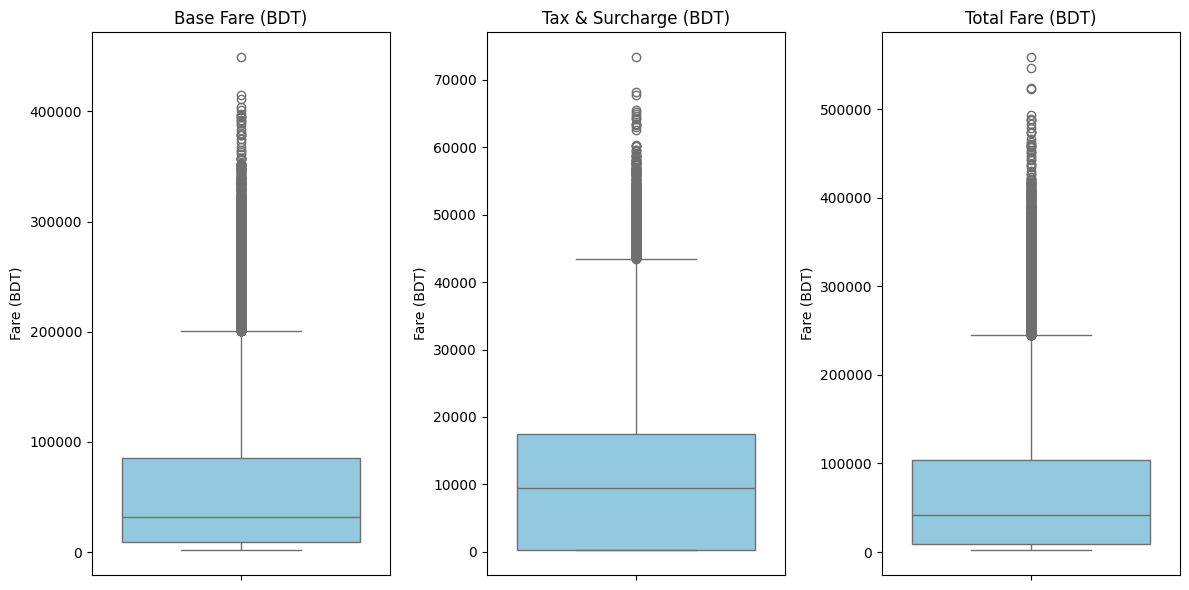

In [9]:
num_col = ['Base Fare (BDT)', 'Tax & Surcharge (BDT)', 'Total Fare (BDT)']

plt.figure(figsize=(12, 6)) 

for i, col in enumerate(num_col, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color='skyblue') 
    plt.title(col) 
    plt.ylabel('Fare (BDT)')  

plt.tight_layout() 
plt.show()

## Correlation Heatmap

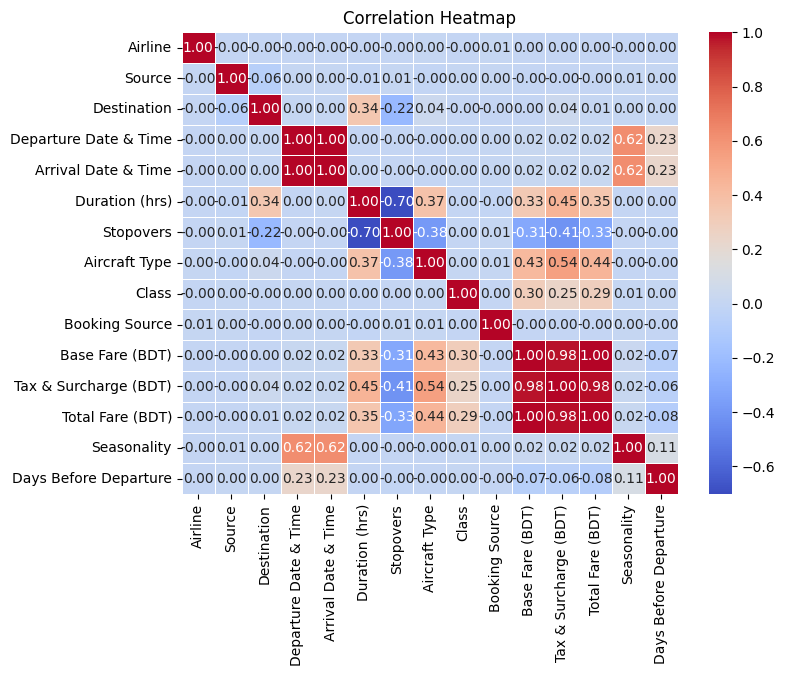

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[not_names].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")

plt.show()

In [11]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title='profile')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 17/17 [00:01<00:00, 15.27it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]